In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

sns.set_style('whitegrid')

In [ ]:
!git clone 'https://github.com/HarshvardhanSingh-13/Datasets'

fatal: destination path 'Datasets' already exists and is not an empty directory.


In [ ]:
df = pd.read_csv('/content/Datasets/Mall Dataset/Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Female,112
Male,88


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.drop('CustomerID',axis=1,inplace=True)

In [ ]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


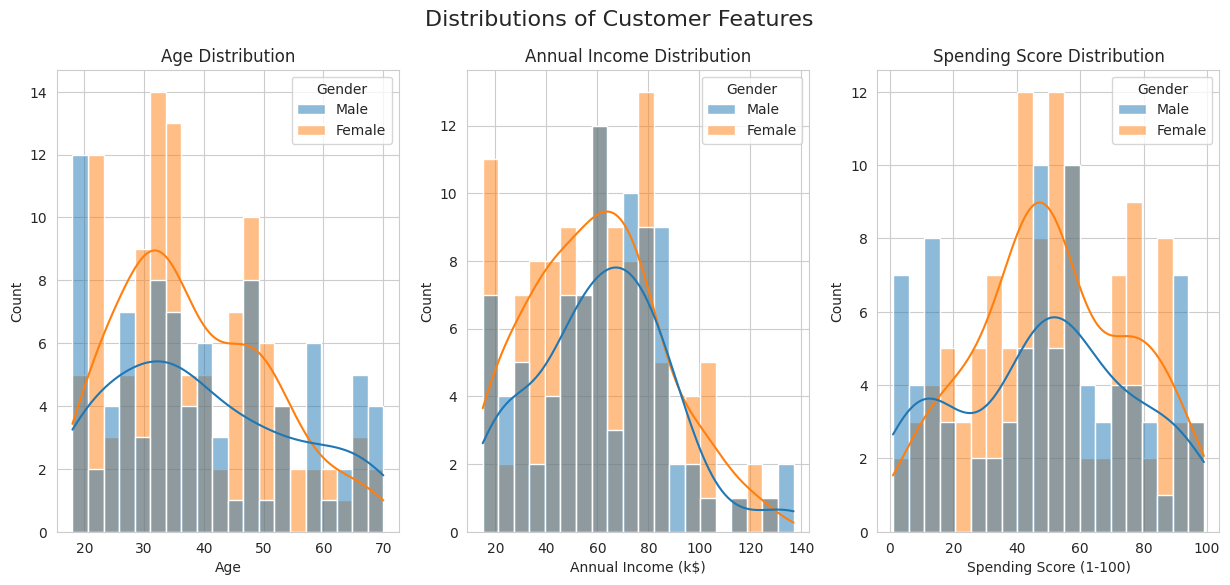

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
fig.suptitle('Distributions of Customer Features', fontsize=16)

sns.histplot(ax=axes[0], data=df, x='Age', kde=True, bins=20, hue='Gender').set_title('Age Distribution')
sns.histplot(ax=axes[1], data=df, x='Annual Income (k$)', kde=True, bins=20, hue='Gender').set_title('Annual Income Distribution')
sns.histplot(ax=axes[2], data=df, x='Spending Score (1-100)', kde=True, bins=20, hue='Gender').set_title('Spending Score Distribution')

plt.show()

In [ ]:
df.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81


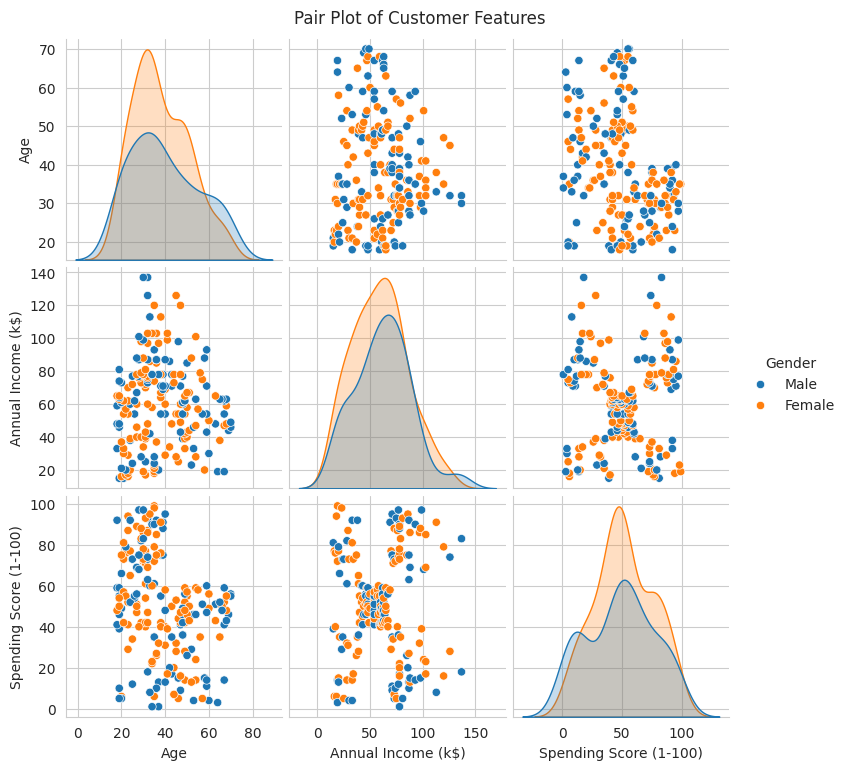

In [ ]:
sns.pairplot(df, vars=['Age','Annual Income (k$)','Spending Score (1-100)'], hue='Gender', diag_kind='kde')
plt.suptitle('Pair Plot of Customer Features', y=1.02)
plt.show()

In [ ]:
fig = px.scatter_3d(
    df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    z='Age',
    color='Gender',
    title='3d Visual'
)

fig.show()

In [ ]:
# 1. Select & Scale the values
X1 = df[['Annual Income (k$)','Spending Score (1-100)']]
scaler1 = StandardScaler()
X1_scaled = scaler1.fit_transform(X1)

In [ ]:
# 2. Implement the Elbow Method
wcss1 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X1_scaled)
    wcss1.append(kmeans.inertia_)

In [ ]:
wcss1

[399.99999999999994,
 269.69101219276405,
 157.70400815035939,
 108.92131661364358,
 65.56840815571681,
 55.057348270385965,
 44.86475569922555,
 37.22818767758587,
 32.39226763033118,
 29.981897788243703]

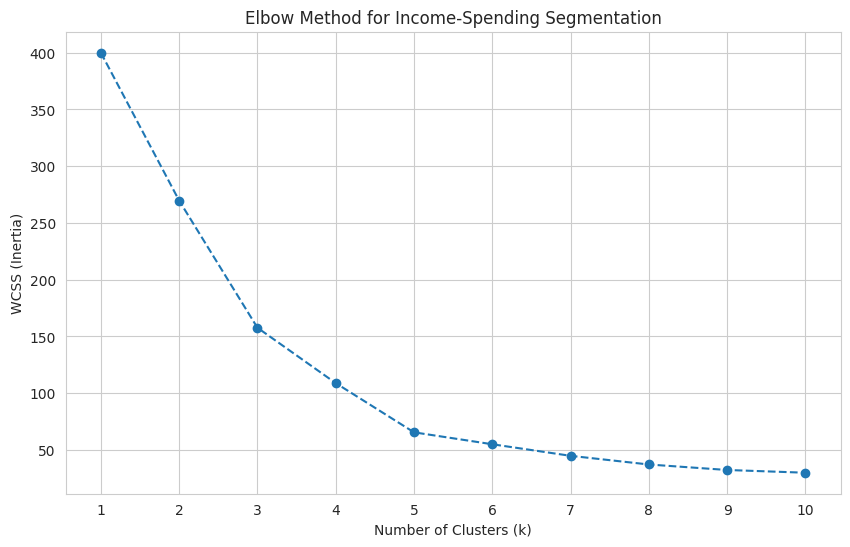

In [ ]:
# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss1, marker='o', linestyle='--')
plt.title('Elbow Method for Income-Spending Segmentation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.show()

In [ ]:
kmeans1 = KMeans(n_clusters=5,init='k-means++', random_state=42, n_init=10)
df['Income Cluster'] = kmeans1.fit_predict(X1_scaled)

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,4
1,Male,21,15,81,2
2,Female,20,16,6,4
3,Female,23,16,77,2
4,Female,31,17,40,4


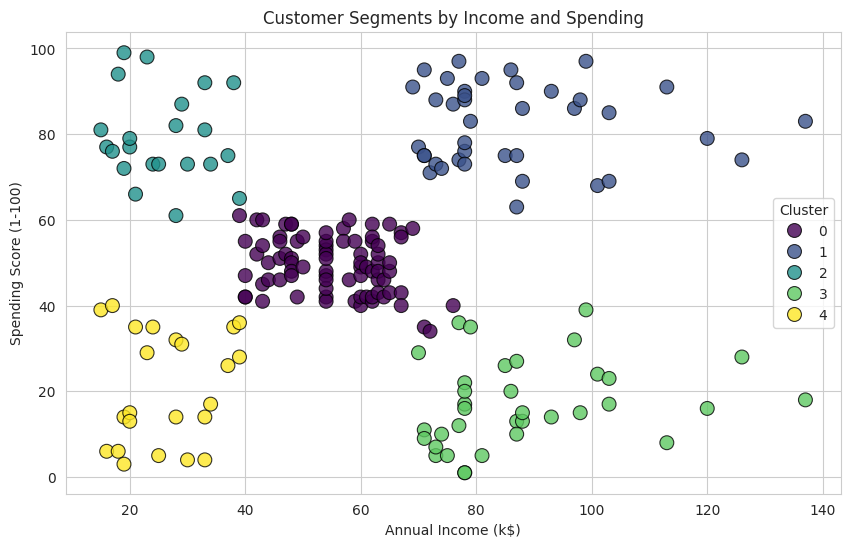

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Income Cluster', palette='viridis', s=100, alpha=0.8, edgecolor='black')
plt.title('Customer Segments by Income and Spending')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Quantitative Persona Analysis
cluster_profiles1 = df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)
cluster_profiles1['Size'] = df['Income Cluster'].value_counts()
print("--- Income-Based Cluster Profiles ---")
cluster_profiles1

--- Income-Based Cluster Profiles ---


,Age,Annual Income (k$),Spending Score (1-100),Size
Income Cluster,,,,
0,42.72,55.30,49.52,81
1,32.69,86.54,82.13,39
2,25.27,25.73,79.36,22
3,41.11,88.20,17.11,35
4,45.22,26.30,20.91,23


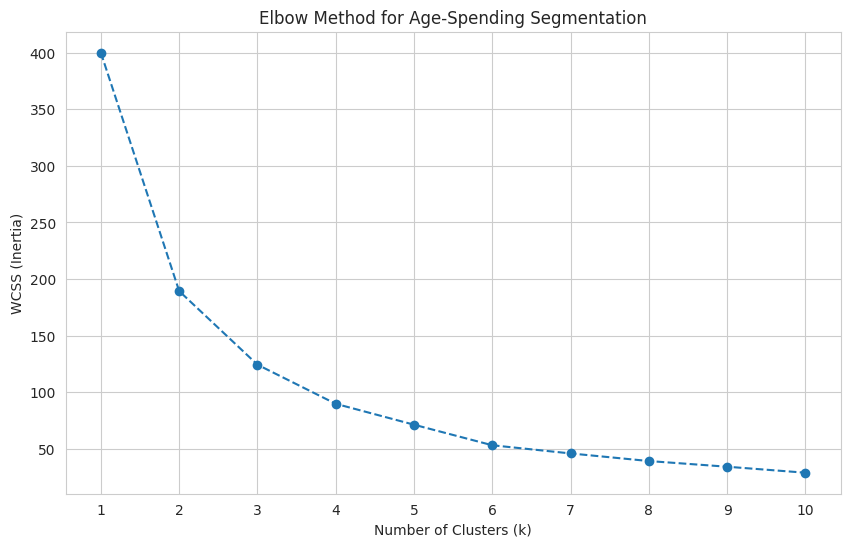

In [ ]:
# 1. Select and scale the features
X2 = df[['Age', 'Spending Score (1-100)']]
scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)

# 2. Implement the Elbow Method
wcss2 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X2_scaled)
    wcss2.append(kmeans.inertia_)

# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss2, marker='o', linestyle='--')
plt.title('Elbow Method for Age-Spending Segmentation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.show()

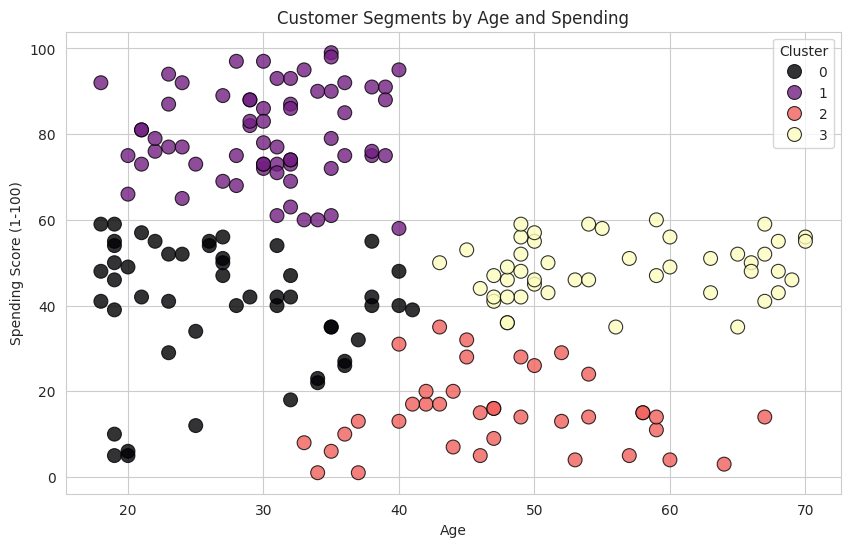

In [ ]:
# Build and fit the final model for age segmentation
kmeans2 = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)
df['Age_Cluster'] = kmeans2.fit_predict(X2_scaled)

# Visualize the new clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)',
                hue='Age_Cluster', palette='magma', s=100, alpha=0.8, edgecolor='black')
plt.title('Customer Segments by Age and Spending')
plt.legend(title='Cluster')
plt.show()

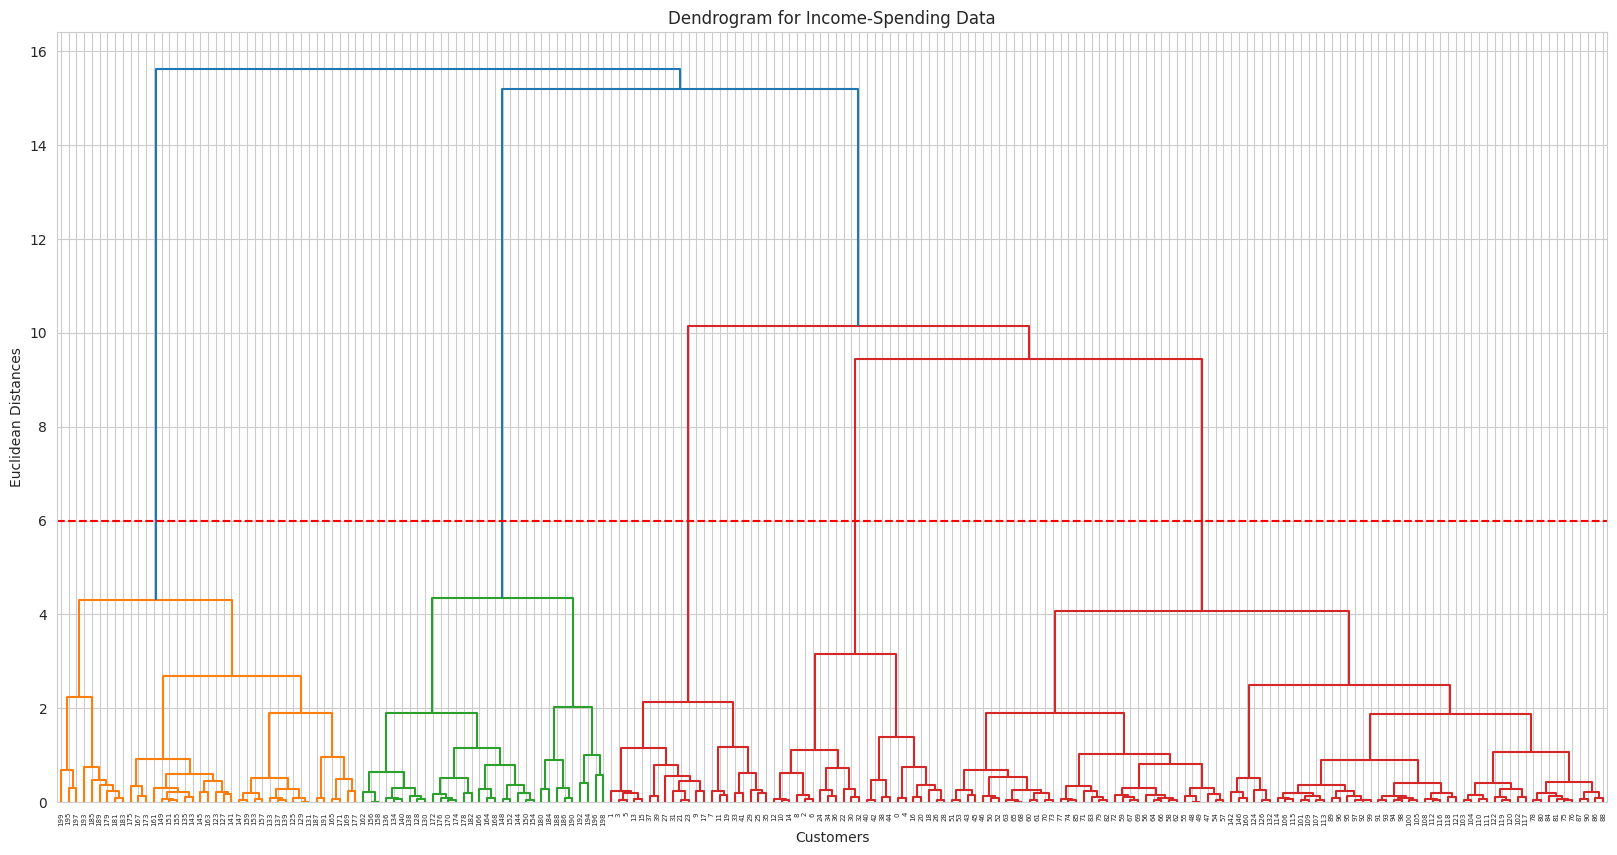

In [ ]:
plt.figure(figsize=(20, 10))
dendrogram = sch.dendrogram(sch.linkage(X1_scaled, method='ward'))
plt.title('Dendrogram for Income-Spending Data')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=6, color='r', linestyle='--') # Example cut-off line
plt.show()

###SUBMISSION CRITERIA
###Explore Gender vs. Spending Score:
Analyze the relationship between Gender and Spending Score (1–100) to see if gender plays a significant role in spending habits. Visualizations and summary statistics would be helpful here.

###Apply Feature Engineering for Clustering:
Create a new feature using existing data (Feature Engineering). Then, explore if clustering can be effectively performed using this newly engineered feature in combination with one or more existing features.
Document the feature engineering process, the chosen features for clustering, the determination of the optimal number of clusters (e.g., using the Elbow Method), and the resulting cluster visualization and interpretation.

In [ ]:
gender_spending_stats = df.groupby('Gender')['Spending Score (1-100)'].describe()
print("Descriptive statistics of 'Spending Score (1-100)' grouped by 'Gender':")
print(gender_spending_stats)

Descriptive statistics of 'Spending Score (1-100)' grouped by 'Gender':
        count       mean       std  min   25%   50%   75%   max
Gender                                                         
Female  112.0  51.526786  24.11495  5.0  35.0  50.0  73.0  99.0
Male     88.0  48.511364  27.89677  1.0  24.5  50.0  70.0  97.0


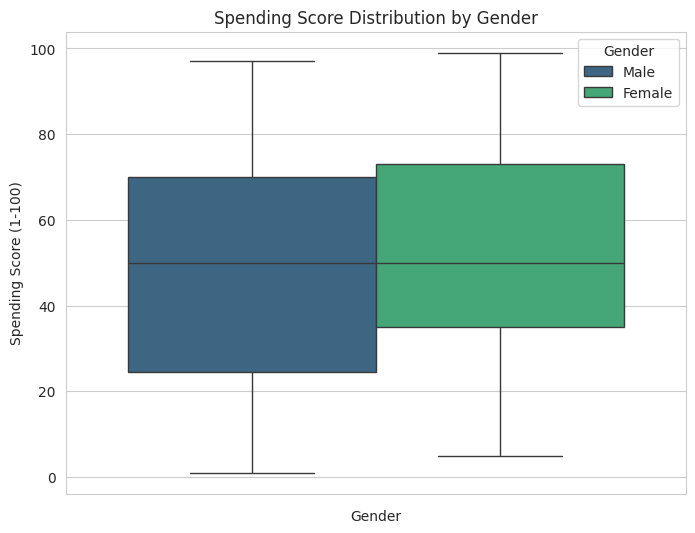

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(hue='Gender', y='Spending Score (1-100)', data=df,palette='viridis')
plt.title('Spending Score Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Summary of Gender vs. Spending Score Analysis

**Descriptive Statistics Interpretation:**
*   **Female Customers:** Have a slightly higher average Spending Score (mean = 51.53) compared to male customers (mean = 48.51). The median spending scores are identical at 50 for both genders, suggesting that for a typical customer, spending habits are similar.
*   **Male Customers:** Show a slightly higher standard deviation (27.90) compared to female customers (24.11), indicating a wider spread or more variability in spending scores among males. The minimum spending score for males is 1, while for females it is 5. The maximum spending score is 99 for females and 97 for males.

**Box Plot Interpretation:**
*   The box plot visually confirms the similar median spending scores for both genders. The middle line (median) within the box is nearly aligned for Male and Female.
*   The interquartile range (IQR, the box itself) for males appears slightly larger than for females, which aligns with the higher standard deviation, suggesting greater variability in the central 50% of male spending scores.
*   Both genders have outliers, indicating some customers with unusually high or low spending scores. The plot shows that both genders have a similar range of spending scores, from very low to very high.

**Conclusion:**
While the mean spending score is marginally higher for females, and the median is the same for both, there isn't a strong indication of significant differences in overall spending habits between genders based on this dataset. The primary difference observed is a slightly greater variability in spending scores among male customers.

In [ ]:
df['Spending_to_Income_Ratio'] = df['Spending Score (1-100)'] / df['Annual Income (k$)']
df.replace([np.inf, -np.inf], np.nan, inplace=True)

scaler = StandardScaler()
df['Spending_to_Income_Ratio_Scaled'] = scaler.fit_transform(df[['Spending_to_Income_Ratio']].fillna(df['Spending_to_Income_Ratio'].mean()))

print("New features 'Spending_to_Income_Ratio' and 'Spending_to_Income_Ratio_Scaled' created:")
df.head()

New features 'Spending_to_Income_Ratio' and 'Spending_to_Income_Ratio_Scaled' created:


,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Age_Cluster,Spending_to_Income_Ratio,Spending_to_Income_Ratio_Scaled
0,Male,19,15,39,4,0,2.600000,1.577244
1,Male,21,15,81,2,1,5.400000,4.460960
2,Female,20,16,6,4,0,0.375000,-0.714279
3,Female,23,16,77,2,1,4.812500,3.855894
4,Female,31,17,40,4,0,2.352941,1.322799


## Determine Optimal Clusters for New Feature


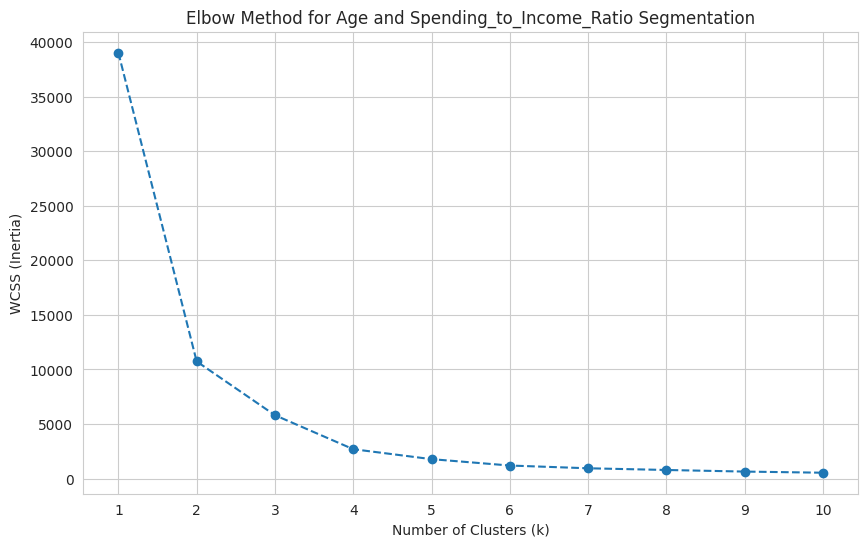

In [ ]:
X3 = df[['Age', 'Spending_to_Income_Ratio_Scaled']]
wcss3 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X3)
    wcss3.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss3, marker='o', linestyle='--')
plt.title('Elbow Method for Age and Spending_to_Income_Ratio Segmentation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.show()

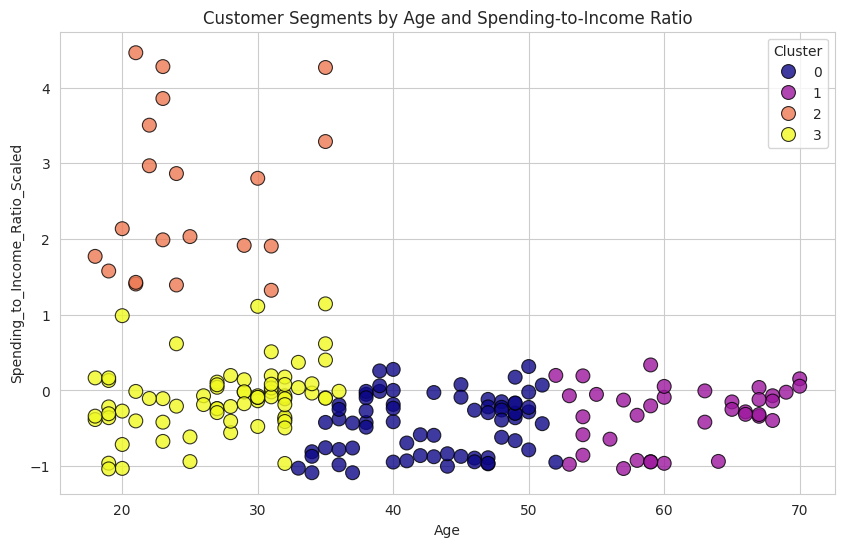

In [ ]:
X3_scaled = scaler.fit_transform(X3)

kmeans3 = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)
df['Age_Spending_Ratio_Cluster'] = kmeans3.fit_predict(X3_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Spending_to_Income_Ratio_Scaled',
                hue='Age_Spending_Ratio_Cluster', palette='plasma', s=100, alpha=0.8, edgecolor='black')
plt.title('Customer Segments by Age and Spending-to-Income Ratio')
plt.xlabel('Age')
plt.ylabel('Spending_to_Income_Ratio_Scaled')
plt.legend(title='Cluster')
plt.show()

**Reasoning**:
To interpret the customer segments, I will calculate the mean values of relevant features for each newly created cluster and then provide a summary of the findings.



In [ ]:
cluster_profiles2 = df.groupby('Age_Spending_Ratio_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Spending_to_Income_Ratio', 'Spending_to_Income_Ratio_Scaled']].mean().round(2)
cluster_profiles2['Size'] = df['Age_Spending_Ratio_Cluster'].value_counts()
print("--- Age and Spending-to-Income Ratio Cluster Profiles ---")
print(cluster_profiles2)

--- Age and Spending-to-Income Ratio Cluster Profiles ---
                              Age  Annual Income (k$)  Spending Score (1-100)  \
Age_Spending_Ratio_Cluster                                                      
0                           42.94               67.93                   39.13   
1                           61.19               52.84                   37.65   
2                           24.85               23.00                   77.55   
3                           27.44               67.70                   59.68   

                            Spending_to_Income_Ratio  \
Age_Spending_Ratio_Cluster                             
0                                               0.64   
1                                               0.76   
2                                               3.55   
3                                               0.96   

                            Spending_to_Income_Ratio_Scaled  Size  
Age_Spending_Ratio_Cluster                        

## Summary of Feature Engineering and Clustering Results

### Feature Engineering: 'Spending_to_Income_Ratio'
To gain a deeper understanding of customer behavior, a new feature called `Spending_to_Income_Ratio` was engineered. This feature was calculated by dividing the `Spending Score (1-100)` by the `Annual Income (k$)`. This ratio quantifies a customer's spending propensity relative to their income. A higher ratio indicates that a customer spends a larger proportion of their income, while a lower ratio suggests more conservative spending habits. The new feature was then scaled using `StandardScaler` to ensure it contributed appropriately to the clustering process, preventing features with larger numerical ranges from dominating the distance calculations.

### Optimal Number of Clusters (Elbow Method)
The Elbow Method was applied to the features 'Age' and the newly scaled 'Spending_to_Income_Ratio_Scaled' to determine the optimal number of clusters for K-Means. The elbow curve, which plots the Within-Cluster Sum of Squares (WCSS) against the number of clusters (k), showed a noticeable bend or 'elbow' at **k=4**. This indicated that 4 clusters provide a good balance between minimizing WCSS and having a manageable number of distinct segments.

### Clustering Results and Customer Personas
K-Means clustering was performed with 4 clusters using 'Age' and 'Spending_to_Income_Ratio_Scaled' as features. The resulting clusters reveal distinct customer personas:

**Cluster 0 (Moderate Spenders, Middle-Aged):**
*   **Age:** 42.94
*   **Annual Income (k$):** 67.93
*   **Spending Score (1-100):** 39.13
*   **Spending_to_Income_Ratio:** 0.64 (Scaled: -0.44)
*   **Size:** 70 customers
*   **Persona:** This is the largest group, characterized by moderate age and income. Their spending score and spending-to-income ratio are average, indicating they are not excessively frugal nor lavish. They represent a stable customer base.

**Cluster 1 (Older, Conservative Spenders):**
*   **Age:** 61.19
*   **Annual Income (k$):** 52.84
*   **Spending Score (1-100):** 37.65
*   **Spending_to_Income_Ratio:** 0.76 (Scaled: -0.32)
*   **Size:** 37 customers
*   **Persona:** This segment consists of older customers with moderate income and relatively low spending scores. Their slightly higher spending-to-income ratio compared to Cluster 0, despite lower income and spending, suggests that while they are generally conservative, their spending is a noticeable portion of their income. They might be retired or have fixed incomes.

**Cluster 2 (Young, High Spending Propensity):**
*   **Age:** 24.85
*   **Annual Income (k$):** 23.00
*   **Spending Score (1-100):** 77.55
*   **Spending_to_Income_Ratio:** 3.55 (Scaled: 2.56)
*   **Size:** 20 customers
*   **Persona:** The youngest cluster, with the lowest annual income but the highest spending score and by far the highest spending-to-income ratio. These customers likely value experiences and immediate gratification, spending a significant portion of their income (or even more) on goods and services. They could be students or young professionals with less financial responsibility.

**Cluster 3 (Young to Middle-Aged, High Income, Moderate Spenders):**
*   **Age:** 27.44
*   **Annual Income (k$):** 67.70
*   **Spending Score (1-100):** 59.68
*   **Spending_to_Income_Ratio:** 0.96 (Scaled: -0.11)
*   **Size:** 73 customers
*   **Persona:** This cluster is characterized by being relatively young to middle-aged, with a good annual income. Their spending score is above average, and their spending-to-income ratio is moderate. This group seems to enjoy spending but does so within their means, perhaps indicating a growing financial maturity or a balance between enjoyment and saving. They represent a significant segment with disposable income.


These personas provide valuable insights for targeted marketing strategies. For instance, Cluster 2 (Young, High Spending Propensity) might respond well to promotions on trendy items or experiences, while Cluster 1 (Older, Conservative Spenders) might prefer value-oriented offers.